In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import norm

plt.rcParams['text.usetex'] = True

In [8]:
def sigmoid(c=0.5, tau=1, N=100):
    eps = 1e-3
    x = np.linspace(-c, 1-c, N)
    assert(np.all(x>=-c) & np.all(x<=1-c))
    nom = (x+c)*(1-c)
    nom[nom==0] += eps
    denom = c*(1-(x+c))
    denom[denom==0] += eps
    return (1+(nom/denom)**(-tau))**(-1), x

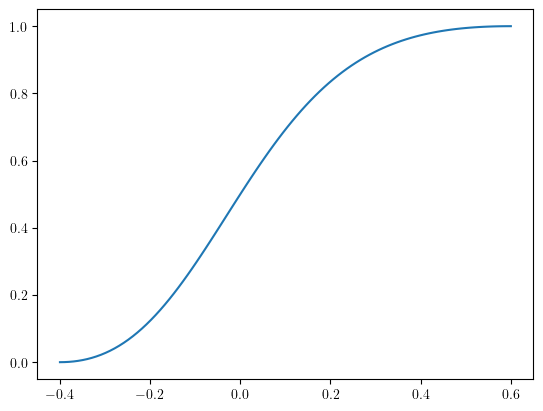

In [12]:
tau = 2
c = 0.4

# N = 100
# x = np.linspace(-c, 1-c, N)
s, x = sigmoid(c, tau)

plt.plot(x,s)
plt.show()

In [77]:
path = './'
SAVE = False

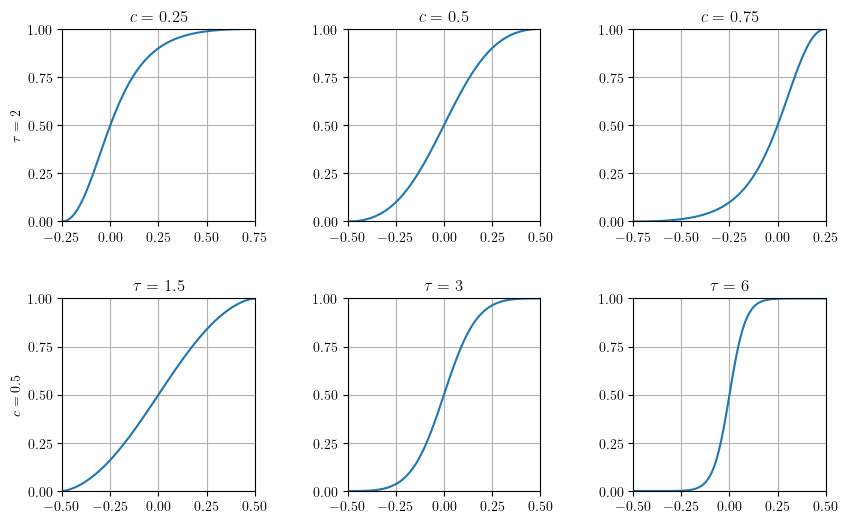

In [80]:
fig = plt.figure() #(constrained_layout=True)
fig.set_size_inches(10,6)
spec = fig.add_gridspec(ncols=3, nrows=2, height_ratios=[0.5, 0.5], wspace=0.4, hspace=0.4)

axs = [[]]*6

tau = 2
cs = [0.25, 0.5, 0.75]
for i,ci in enumerate(cs):
    axs[i] = fig.add_subplot(spec[0,i])
    s, x = sigmoid(ci, tau)
    axs[i].plot(x, s)
    axs[i].set_xlim(-ci,1-ci)
    axs[i].set_ylim(0,1)
    axs[i].set_yticks([0.,0.25,0.5,0.75,1.])
#     axs[i].set_title(r'$\sigma_{}(\cdotp;{})$'.format(tau,ci))
    axs[i].set_title(r'$c={}$'.format(ci))
    if i==0:
        axs[i].set_ylabel(r'$\tau={}$'.format(tau))
    axs[i].grid()
    axs[i].set_box_aspect(1)
#     x_left, x_right = axs[i].get_xlim()
#     y_low, y_high = axs[i].get_ylim()
#     axs[i].set_aspect(abs((x_right-x_left)/(y_low-y_high))*0.5)

taus = [1.5,3,6]
c = 0.5
for i,taui in enumerate(taus):
    axs[i] = fig.add_subplot(spec[1,i])
    s, x = sigmoid(c, taui)
    axs[i].plot(x, s)
    axs[i].set_xlim(-c,1-c)
    axs[i].set_ylim(0,1)
    axs[i].set_yticks([0.,0.25,0.5,0.75,1.])
#     axs[i].set_title(r'$\sigma_{}(\cdotp;{})$'.format(taui,c))
    axs[i].set_title(r'$\tau={}$'.format(taui))
    if i==0:
        axs[i].set_ylabel(r'$c={}$'.format(c))
    axs[i].grid()
    axs[i].set_box_aspect(1)

if SAVE:
    plt.savefig(path + '/sigmoid.pdf', format='pdf')
    plt.savefig(path + '/sigmoid.png', format='png')
else:
    plt.show()